# The IMDB dataset

In [19]:
from keras.datasets import imdb
from keras import optimizers 
import numpy as np
from keras import models
from keras import layers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
F:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
F:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you m

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

Because you’re restricting yourself to the top 10,000 most frequent words, no word
index will exceed 10,000

In [7]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here’s how you can quickly decode one of these reviews back to English
words:

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


 Encoding the integer sequences into a binary matrix


In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
 x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels, which is straightforward:


In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Defining Model

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model

In [20]:
# Optimizer with custom learning rate
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
loss='binary_crossentropy',
metrics=['accuracy'])

# Using Validation approach

In [21]:
# Seperating validation data from Training Data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [22]:
# Seperating validation data from lable Data
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training Model

In [23]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 156ms/step - loss: 0.5046 - acc: 0.7904 - val_loss: 0.4514 - val_acc: 0.7975
Epoch 2/20
30/30 [==============================] - 3s 114ms/step - loss: 0.3017 - acc: 0.9021 - val_loss: 0.2990 - val_acc: 0.8877
Epoch 3/20
30/30 [==============================] - 3s 108ms/step - loss: 0.2205 - acc: 0.9249 - val_loss: 0.2931 - val_acc: 0.8823
Epoch 4/20
30/30 [==============================] - 3s 106ms/step - loss: 0.1707 - acc: 0.9449 - val_loss: 0.2778 - val_acc: 0.8869
Epoch 5/20
30/30 [==============================] - 3s 107ms/step - loss: 0.1394 - acc: 0.9550 - val_loss: 0.3032 - val_acc: 0.8788
Epoch 6/20
30/30 [==============================] - 3s 114ms/step - loss: 0.1139 - acc: 0.9648 - val_loss: 0.3016 - val_acc: 0.8846
Epoch 7/20
30/30 [==============================] - 3s 110ms/step - loss: 0.0919 - acc: 0.9735 - val_loss: 0.3257 - val_acc: 0.8829
Epoch 8/20
30/30 [==============================] - 3s 115ms/step - loss: 0.

In [24]:
# Extrating accuracy and loss variables
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Plotting the training and validation loss

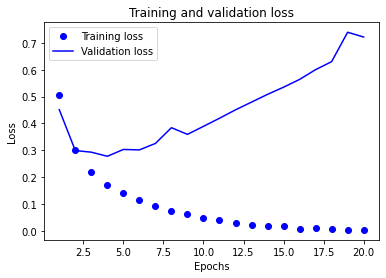

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy

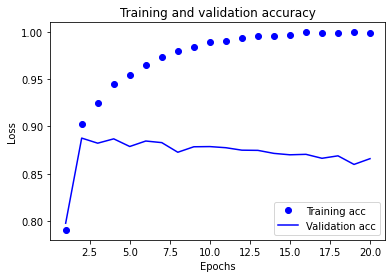

In [26]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()